# Importing 

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Data sets'
climate = pd.read_csv(os.path.join(path, 'DataSet_scaled.csv'))

# Data Prep

In [2]:
climate.head()

Unnamed: 0  id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0           0   0  19600101      1           0.660514          -0.02793   
1           1   1  19600102      1           0.244897          -0.02793   
2           2   2  19600103      1           1.076130          -0.02793   
3           3   3  19600104      1          -1.001953          -0.02793   
4           4   4  19600105      1           0.244897          -0.02793   

   BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0        0.826097       -0.001949               -1.101066   
1        0.735760       -0.001949               -1.058108   
2        1.277781       -0.001949               -1.251420   
3        1.458455       -0.001949               -0.821838   
4        1.729466       -0.001949               -0.746661   

   BASEL_precipitation  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0            -0.265148  ...             -0.443701           0.761754   
1             1.658760  ...              0.783085           1.183580   
2             0.155707  ...              0.783085           1.183580   
3            -0.445514  ...              0.783085           0.480538   
4            -0.164944  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 172 columns]

In [3]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [4]:
# Dropping all nonscaled values 
notemp = df.drop(['DATE','MONTH'], axis=1)

In [5]:
# fixing issue where original data in str format causes misrepesenting of years 
df['DATE'] = pd.to_datetime(df['DATE'].astype(str), format='%Y%m%d', errors='coerce')

# Steps 5 and 6

In [6]:
# looking at the most recent year with complete measurements 
dfyear = df[df['DATE'].astype(str).str.contains('2021')] 
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  365  365.000000       365.000000          365.000000   
mean   2021-07-02 00:00:00    6.526027         0.032909            0.128766   
min    2021-01-01 00:00:00    1.000000        -2.212624           -2.049648   
25%    2021-04-02 00:00:00    4.000000        -0.745913           -0.631005   
50%    2021-07-02 00:00:00    7.000000        -0.012558           -0.040850   
75%    2021-10-01 00:00:00   10.000000         0.883765            0.935177   
max    2021-12-31 00:00:00   12.000000         2.078863            2.263027   
std                    NaN    3.452584         0.949455            1.005278   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count        3.650000e+02        365.000000            365.000000   
mean        -5.166671e-03          0.072520              0.013712   
min         -5.166671e-03         -2.503513             -2.668269   
25%         -5.166671e-03         -0.683956             -0.680175   
50%         -5.166671e-03          0.043867             -0.061656   
75%         -5.166671e-03          0.993200              0.880848   
max         -5.166671e-03          2.211512              2.559684   
std          5.211314e-17          0.966594              0.975583   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000      3.650000e+02   
mean           0.088705            0.085045     -5.705221e-03   
min           -2.986526           -2.185550     -5.705221e-03   
25%           -0.748564           -0.683021     -5.705221e-03   
50%           -0.006839           -0.001641     -5.705221e-03   
75%            1.029017            0.994221     -5.705221e-03   
max            2.320641            2.391923     -5.705221e-03   
std            1.066883            1.010767      4.777038e-17   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean              0.101863              0.062647          0.089456   
min              -1.855184             -2.572588         -2.470980   
25%              -0.704829             -0.667200         -0.664782   
50%              -0.087270             -0.022069         -0.085181   
75%               0.941995              0.923123          0.817918   
max               2.092351              2.423428          2.489325   
std               1.014904              0.964474          1.009745   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000    3.650000e+02   
mean             0.090138        0.102767   -7.461638e-04   
min             -2.125714       -2.152421   -7.461638e-04   
25%             -0.667898       -0.574890   -7.461638e-04   
50%              0.035875        0.068257   -7.461638e-04   
75%              0.865322        1.063315   -7.461638e-04   
max              2.109492        2.082643   -7.461638e-04   
std              0.926124        1.061531    4.559900e-18   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.045401             0.099155         0.116518   
min              -2.815348            -2.294481        -2.281025   
25%              -0.636209            -0.577681        -0.649512   
50%               0.036546             0.019467         0.056432   
75%               0.855551             0.940070         0.966314   
max               2.215685             2.358296         2.111511   
std               1.026706             1.048349         0.985446   

       VALENTIA_temp_mean  
count        3.650000e+02  
mean        -7.287352e-03  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03  
std          4.603327e-17

In [7]:
# removing all non scaled values 
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [8]:
# creating index for the year 
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [9]:
n_rows = dfyear.shape[0]
n_rows

365

In [10]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1) 

In [11]:
X.shape, y.shape

((365, 2), (365, 1))

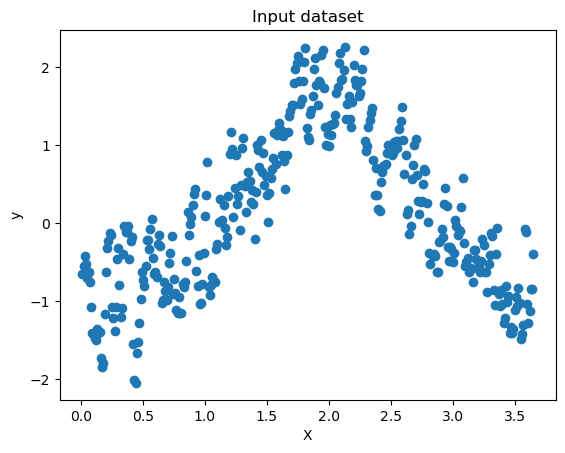

In [12]:
# plotting the mean temp over the year
plt.scatter(x=index['index'], y=dfyear['BELGRADE_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [13]:
#This computes the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [14]:
compute_cost(X,y)

array([0.51219833])

In [15]:
#This is the gradiant descent function. 

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [16]:
%%time


num_iterations=100 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 51.5 ms


In [17]:
theta

array([[-0.39164061],
       [ 0.24794071]])

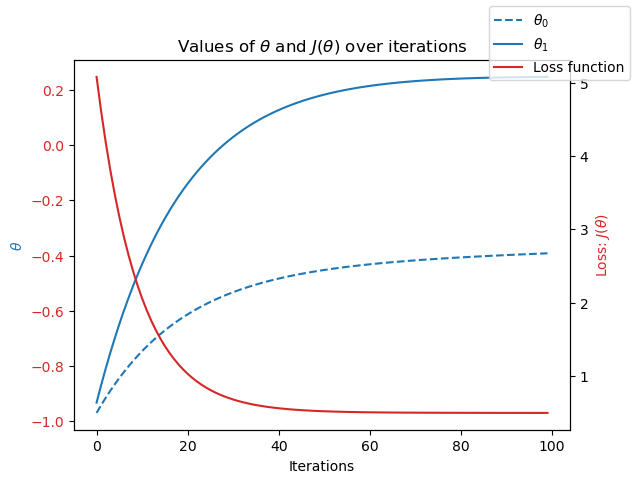

In [18]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [19]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.,2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1.0,1.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 31.2 ms
Wall time: 34.3 ms


In [20]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Step 7 

## starting with Belagrade

In [22]:
dfyear1 = df[df['DATE'].astype(str).str.contains('1960')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   1960-07-01 12:00:00    6.513661        -0.102317           -0.032384   
min    1960-01-01 00:00:00    1.000000        -3.190431           -2.401472   
25%    1960-04-01 06:00:00    4.000000        -0.756099           -0.594120   
50%    1960-07-01 12:00:00    7.000000        -0.053300            0.055618   
75%    1960-09-30 18:00:00    9.750000         0.649499            0.662798   
max    1960-12-31 00:00:00   12.000000         1.820830            1.843109   
std                    NaN    3.455958         0.935826            0.920271   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   
std              0.946637          0.910451              0.919531   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   
std            0.978767            0.919195          0.964448   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   
std               0.906193              0.902235          0.979590   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   
std              0.938523        0.998018        1.002362   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   
std               0.884235             0.988702         0.944029   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381  
std              1.127911

In [23]:
# we need to update n rows 
n_rows = dfyear1.shape[0]
n_rows

366

In [24]:
# its a leap year so index also needs an adjustment
i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [25]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1)

In [26]:
X.shape, y.shape

((366, 2), (366, 1))

In [27]:
compute_cost(X,y)

array([0.42281659])

In [30]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 109 ms
Wall time: 101 ms


In [34]:
theta

array([[-0.50978013],
       [ 0.27036847]])

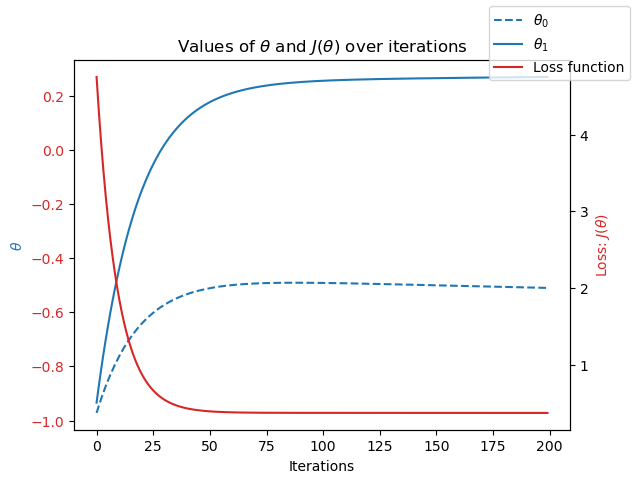

In [31]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [32]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.,2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1.0,1.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 46.9 ms
Wall time: 35.7 ms


In [33]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [35]:
dfyear1 = df[df['DATE'].astype(str).str.contains('1990')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  365  365.000000       365.000000          365.000000   
mean   1990-07-02 00:00:00    6.526027         0.070861            0.043663   
min    1990-01-01 00:00:00    1.000000        -1.818785           -2.537662   
25%    1990-04-02 00:00:00    4.000000        -0.582946           -0.631005   
50%    1990-07-02 00:00:00    7.000000         0.109668            0.152086   
75%    1990-10-01 00:00:00   10.000000         0.734378            0.708194   
max    1990-12-31 00:00:00   12.000000         1.997379            1.740967   
std                    NaN    3.452584         0.901173            0.898311   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean             0.027964          0.139493              0.146131   
min             -2.357847         -1.633290             -1.607952   
25%             -0.640390         -0.525734             -0.532908   
50%              0.077177          0.154622              0.173970   
75%              0.724164          0.708400              0.763035   
max              1.876978          2.417201              2.765857   
std              0.906770          0.839960              0.882042   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean           0.150405            0.152728          0.104417   
min           -1.592595           -1.888539         -1.748156   
25%           -0.518374           -0.630607         -0.625900   
50%            0.172198            0.138129          0.082894   
75%            0.786039            0.802037          0.762154   
max            1.898625            2.828705          2.475072   
std            0.756431            0.942064          0.930487   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.001047              0.095736          0.063753   
min              -2.266890             -1.747420         -1.743109   
25%              -0.704829             -0.607188         -0.799573   
50%              -0.002507              0.097955         -0.112140   
75%               0.663488              0.683074          0.993146   
max               1.801735              2.603464          2.165827   
std               0.911890              0.885778          1.023386   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean             0.003406        0.144391        0.038743   
min             -2.490168       -1.933994       -2.088684   
25%             -0.680466       -0.477811       -0.893171   
50%              0.073577        0.080392       -0.051261   
75%              0.701946        0.857022        1.026385   
max              1.946116        1.767136        2.019839   
std              0.923807        0.825958        1.130786   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.037507             0.131603         0.137621   
min              -2.435095            -1.572927        -2.139837   
25%              -0.519208            -0.552800        -0.649512   
50%               0.109671             0.081670         0.150558   
75%               0.665425             0.828105         0.856501   
max               1.879307             1.985078         2.644891   
std               0.866875             0.789326         0.980101   

       VALENTIA_temp_mean  
count          365.000000  
mean             0.135022  
min             -2.290492  
25%             -0.788384  
50%              0.142923  
75%              0.863935  
max              2.966887  
std              1.096645

In [36]:
# we need to update n rows 
n_rows = dfyear1.shape[0]
n_rows

365

In [37]:
# now its not a leap year so index also needs an adjustment
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [38]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1)

In [39]:
X.shape, y.shape

((365, 2), (365, 1))

In [40]:
compute_cost(X,y)

array([0.40332895])

In [41]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 101 ms


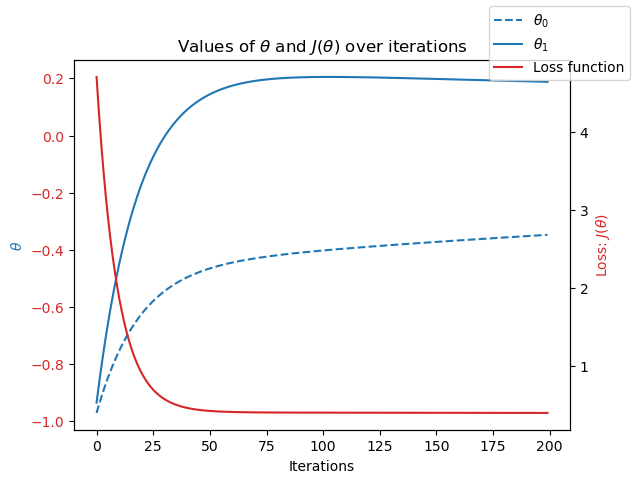

In [42]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [43]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.,2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1.0,1.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 31.2 ms
Wall time: 35.2 ms


In [44]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [45]:
dfyear1 = df[df['DATE'].astype(str).str.contains('2020')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   2020-07-01 12:00:00    6.513661         0.236087            0.191498   
min    2020-01-01 00:00:00    1.000000        -1.682979           -1.629730   
25%    2020-04-01 06:00:00    4.000000        -0.552389           -0.560073   
50%    2020-07-01 12:00:00    7.000000         0.238684            0.237205   
75%    2020-09-30 18:00:00    9.750000         0.978830            0.986248   
max    2020-12-31 00:00:00   12.000000         2.309734            1.945251   
std                    NaN    3.455958         0.934854            0.915643   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.172345          0.263519              0.226841   
min             -1.581463         -1.490890             -1.607952   
25%             -0.590396         -0.430800             -0.503455   
50%              0.177166          0.233733              0.173970   
75%              0.947669          0.898267              0.851395   
max              1.935795          2.686179              2.500777   
std              0.923699          0.880960              0.905961   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000      3.660000e+02   
mean           0.246097            0.241620     -5.705221e-03   
min           -1.336828           -2.115665     -5.705221e-03   
25%           -0.425658           -0.508308     -5.705221e-03   
50%            0.140227            0.103186     -5.705221e-03   
75%            0.949090            1.029164     -5.705221e-03   
max            2.039297            3.038360     -5.705221e-03   
std            0.815164            0.974223      4.777020e-17   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.170559              0.279836          0.145252   
min              -1.625113             -1.732417         -1.635277   
25%              -0.644284             -0.427152         -0.637824   
50%               0.209401              0.232983         -0.091921   
75%               0.923832              0.949378          0.996516   
max               1.934934              2.783501          2.327576   
std               0.916080              0.913584          1.003402   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000    3.660000e+02   
mean             0.250035        0.275909   -7.461638e-04   
min             -1.434508       -1.290846   -7.461638e-04   
25%             -0.476246       -0.356463   -7.461638e-04   
50%              0.293506        0.110729   -7.461638e-04   
75%              0.953293        0.866124   -7.461638e-04   
max              2.147194        2.203991   -7.461638e-04   
std              0.875189        0.783143    4.451314e-18   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.256961             0.295811         0.319435   
min              -2.113343            -1.075304        -1.543707   
25%              -0.292519            -0.328869        -0.414197   
50%               0.248609             0.112771         0.323121   
75%               0.914051             0.949400         0.966314   
max               2.230310             2.159246         2.660579   
std               0.888164             0.788996         0.922377   

       VALENTIA_temp_mean  
count        3.660000e+02  
mean        -7.287352e-03  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03  
std          4.603310e-17

In [46]:
# we need to update n rows 
n_rows = dfyear1.shape[0]
n_rows

366

In [47]:
# its a leap year so index also needs an adjustment
i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [48]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1)

In [49]:
X.shape, y.shape

((366, 2), (366, 1))

In [50]:
compute_cost(X,y)

array([0.43639184])

In [51]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 101 ms


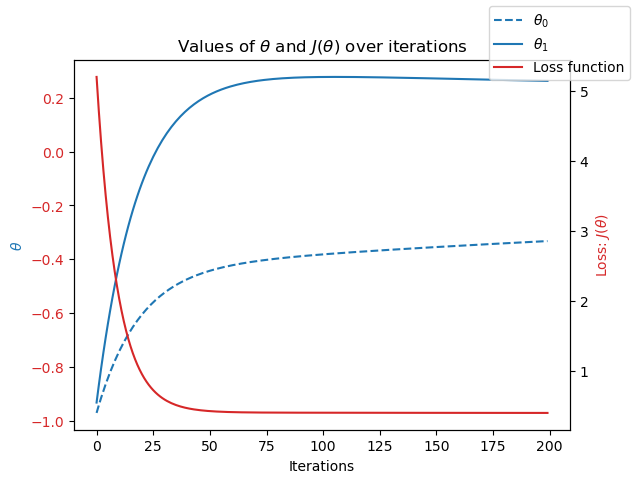

In [52]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [53]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.,2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1.0,1.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 31.2 ms
Wall time: 34.2 ms


In [54]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## Now checking Heathrow

In [55]:
dfyear1 = df[df['DATE'].astype(str).str.contains('1960')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   1960-07-01 12:00:00    6.513661        -0.102317           -0.032384   
min    1960-01-01 00:00:00    1.000000        -3.190431           -2.401472   
25%    1960-04-01 06:00:00    4.000000        -0.756099           -0.594120   
50%    1960-07-01 12:00:00    7.000000        -0.053300            0.055618   
75%    1960-09-30 18:00:00    9.750000         0.649499            0.662798   
max    1960-12-31 00:00:00   12.000000         1.820830            1.843109   
std                    NaN    3.455958         0.935826            0.920271   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   
std              0.946637          0.910451              0.919531   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   
std            0.978767            0.919195          0.964448   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   
std               0.906193              0.902235          0.979590   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   
std              0.938523        0.998018        1.002362   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   
std               0.884235             0.988702         0.944029   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381  
std              1.127911

In [56]:
# we need to update n rows 
n_rows = dfyear1.shape[0]
n_rows

366

In [57]:
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [58]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['HEATHROW_temp_mean'].to_numpy().reshape(n_rows,1)

In [59]:
X.shape, y.shape

((366, 2), (366, 1))

In [60]:
compute_cost(X,y)

array([0.42664811])

In [61]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 125 ms
Wall time: 102 ms


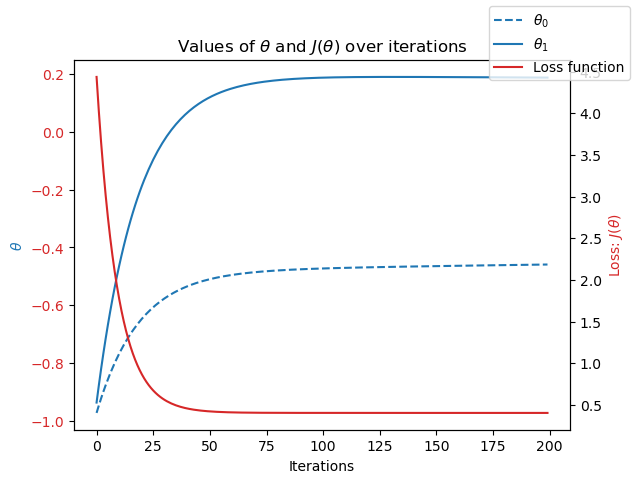

In [62]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [63]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.,2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1.0,1.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 31.2 ms
Wall time: 34.7 ms


In [64]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [65]:
dfyear1 = df[df['DATE'].astype(str).str.contains('1990')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  365  365.000000       365.000000          365.000000   
mean   1990-07-02 00:00:00    6.526027         0.070861            0.043663   
min    1990-01-01 00:00:00    1.000000        -1.818785           -2.537662   
25%    1990-04-02 00:00:00    4.000000        -0.582946           -0.631005   
50%    1990-07-02 00:00:00    7.000000         0.109668            0.152086   
75%    1990-10-01 00:00:00   10.000000         0.734378            0.708194   
max    1990-12-31 00:00:00   12.000000         1.997379            1.740967   
std                    NaN    3.452584         0.901173            0.898311   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean             0.027964          0.139493              0.146131   
min             -2.357847         -1.633290             -1.607952   
25%             -0.640390         -0.525734             -0.532908   
50%              0.077177          0.154622              0.173970   
75%              0.724164          0.708400              0.763035   
max              1.876978          2.417201              2.765857   
std              0.906770          0.839960              0.882042   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean           0.150405            0.152728          0.104417   
min           -1.592595           -1.888539         -1.748156   
25%           -0.518374           -0.630607         -0.625900   
50%            0.172198            0.138129          0.082894   
75%            0.786039            0.802037          0.762154   
max            1.898625            2.828705          2.475072   
std            0.756431            0.942064          0.930487   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.001047              0.095736          0.063753   
min              -2.266890             -1.747420         -1.743109   
25%              -0.704829             -0.607188         -0.799573   
50%              -0.002507              0.097955         -0.112140   
75%               0.663488              0.683074          0.993146   
max               1.801735              2.603464          2.165827   
std               0.911890              0.885778          1.023386   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean             0.003406        0.144391        0.038743   
min             -2.490168       -1.933994       -2.088684   
25%             -0.680466       -0.477811       -0.893171   
50%              0.073577        0.080392       -0.051261   
75%              0.701946        0.857022        1.026385   
max              1.946116        1.767136        2.019839   
std              0.923807        0.825958        1.130786   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.037507             0.131603         0.137621   
min              -2.435095            -1.572927        -2.139837   
25%              -0.519208            -0.552800        -0.649512   
50%               0.109671             0.081670         0.150558   
75%               0.665425             0.828105         0.856501   
max               1.879307             1.985078         2.644891   
std               0.866875             0.789326         0.980101   

       VALENTIA_temp_mean  
count          365.000000  
mean             0.135022  
min             -2.290492  
25%             -0.788384  
50%              0.142923  
75%              0.863935  
max              2.966887  
std              1.096645

In [66]:
# we need to update n rows 
n_rows = dfyear1.shape[0]
n_rows

365

In [67]:
# its not a leap year so index also needs an adjustment
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [68]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['HEATHROW_temp_mean'].to_numpy().reshape(n_rows,1)

In [69]:
X.shape, y.shape

((365, 2), (365, 1))

In [70]:
compute_cost(X,y)

array([0.45418923])

In [71]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 101 ms


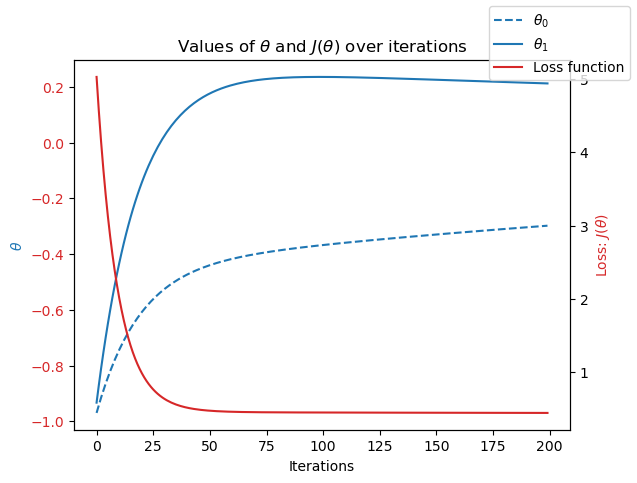

In [72]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [77]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10.0,10.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.69 s
Wall time: 1.68 s


In [78]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## Discovery 
At this point I noticed that my graphs all look very similar and return similar results. I have been a bit lazy with my renaming of variables as this exercise requires alot of running the same code over and over again. To double check my results I renamed some variables and started updating the inputs at various points in the process. Here I found that my process was good with the variable names, but discovered something else. The result of the line graph seems entirely dependant on what the intial guess of theta is and the step size to find it. This leads me to some confusion as to what the correct way to use this formula is and if this formula has a robust enough identification metric for when it gives the correct answer. Either way continuing the exercise. 

In [137]:
df1 = df[df['DATE'].astype(str).str.contains('1960')] 
n_rows = df1.shape[0]
i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df1['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1)
compute_cost(X,y)

array([0.42281659])

In [138]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 101 ms


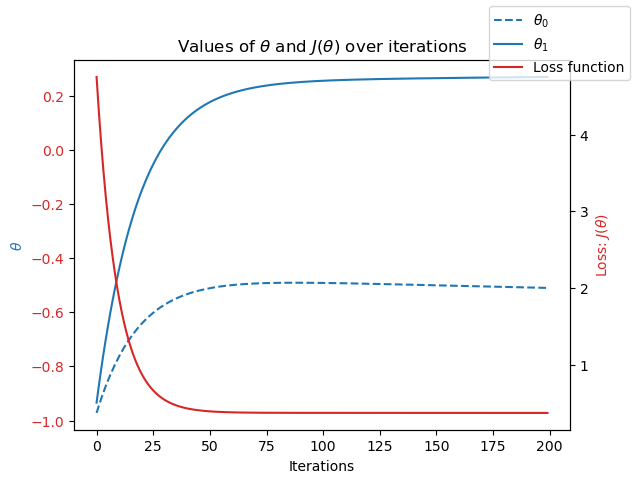

In [139]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

## Exercise continues with Heathrow 2020

In [140]:
dfyear1 = df[df['DATE'].astype(str).str.contains('2020')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   2020-07-01 12:00:00    6.513661         0.236087            0.191498   
min    2020-01-01 00:00:00    1.000000        -1.682979           -1.629730   
25%    2020-04-01 06:00:00    4.000000        -0.552389           -0.560073   
50%    2020-07-01 12:00:00    7.000000         0.238684            0.237205   
75%    2020-09-30 18:00:00    9.750000         0.978830            0.986248   
max    2020-12-31 00:00:00   12.000000         2.309734            1.945251   
std                    NaN    3.455958         0.934854            0.915643   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.172345          0.263519              0.226841   
min             -1.581463         -1.490890             -1.607952   
25%             -0.590396         -0.430800             -0.503455   
50%              0.177166          0.233733              0.173970   
75%              0.947669          0.898267              0.851395   
max              1.935795          2.686179              2.500777   
std              0.923699          0.880960              0.905961   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000      3.660000e+02   
mean           0.246097            0.241620     -5.705221e-03   
min           -1.336828           -2.115665     -5.705221e-03   
25%           -0.425658           -0.508308     -5.705221e-03   
50%            0.140227            0.103186     -5.705221e-03   
75%            0.949090            1.029164     -5.705221e-03   
max            2.039297            3.038360     -5.705221e-03   
std            0.815164            0.974223      4.777020e-17   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.170559              0.279836          0.145252   
min              -1.625113             -1.732417         -1.635277   
25%              -0.644284             -0.427152         -0.637824   
50%               0.209401              0.232983         -0.091921   
75%               0.923832              0.949378          0.996516   
max               1.934934              2.783501          2.327576   
std               0.916080              0.913584          1.003402   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000    3.660000e+02   
mean             0.250035        0.275909   -7.461638e-04   
min             -1.434508       -1.290846   -7.461638e-04   
25%             -0.476246       -0.356463   -7.461638e-04   
50%              0.293506        0.110729   -7.461638e-04   
75%              0.953293        0.866124   -7.461638e-04   
max              2.147194        2.203991   -7.461638e-04   
std              0.875189        0.783143    4.451314e-18   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.256961             0.295811         0.319435   
min              -2.113343            -1.075304        -1.543707   
25%              -0.292519            -0.328869        -0.414197   
50%               0.248609             0.112771         0.323121   
75%               0.914051             0.949400         0.966314   
max               2.230310             2.159246         2.660579   
std               0.888164             0.788996         0.922377   

       VALENTIA_temp_mean  
count        3.660000e+02  
mean        -7.287352e-03  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03  
std          4.603310e-17

In [141]:
n_rows = dfyear1.shape[0]
n_rows

366

In [142]:
# its a leap year so index also needs an adjustment
i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [143]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['HEATHROW_temp_mean'].to_numpy().reshape(n_rows,1)

In [144]:
X.shape, y.shape

((366, 2), (366, 1))

In [145]:
compute_cost(X,y)

array([0.50244867])

In [146]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 102 ms


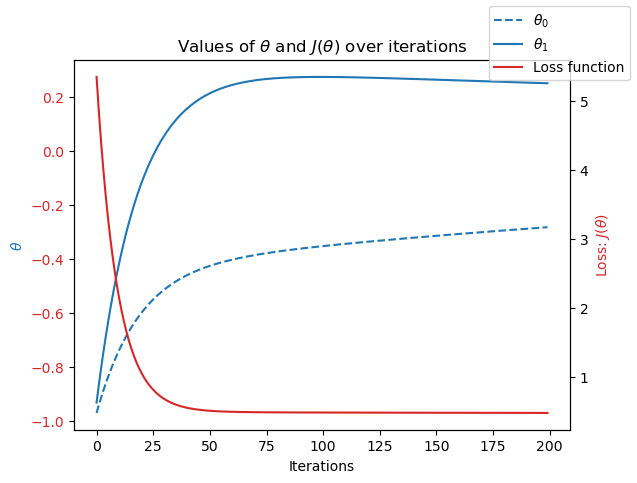

In [147]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [148]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10.0,10.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.75 s
Wall time: 1.75 s


In [149]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## Roma and theta guess variation 

In [150]:
dfyear1 = df[df['DATE'].astype(str).str.contains('1960')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   1960-07-01 12:00:00    6.513661        -0.102317           -0.032384   
min    1960-01-01 00:00:00    1.000000        -3.190431           -2.401472   
25%    1960-04-01 06:00:00    4.000000        -0.756099           -0.594120   
50%    1960-07-01 12:00:00    7.000000        -0.053300            0.055618   
75%    1960-09-30 18:00:00    9.750000         0.649499            0.662798   
max    1960-12-31 00:00:00   12.000000         1.820830            1.843109   
std                    NaN    3.455958         0.935826            0.920271   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   
std              0.946637          0.910451              0.919531   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   
std            0.978767            0.919195          0.964448   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   
std               0.906193              0.902235          0.979590   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   
std              0.938523        0.998018        1.002362   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   
std               0.884235             0.988702         0.944029   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381  
std              1.127911

In [151]:
n_rows = dfyear1.shape[0]
i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])

In [152]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['ROMA_temp_mean'].to_numpy().reshape(n_rows,1)

In [153]:
X.shape, y.shape

((366, 2), (366, 1))

In [154]:
compute_cost(X,y)

array([0.5052758])

In [155]:
%%time


num_iterations=200 
theta_init=np.array([[-1],[-1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 101 ms


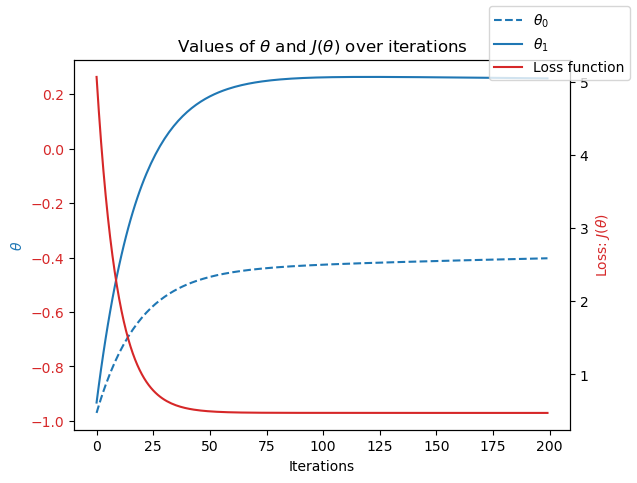

In [156]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [157]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10.0,10.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.69 s
Wall time: 1.68 s


In [158]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [159]:
dfyear1 = df[df['DATE'].astype(str).str.contains('1990')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  365  365.000000       365.000000          365.000000   
mean   1990-07-02 00:00:00    6.526027         0.070861            0.043663   
min    1990-01-01 00:00:00    1.000000        -1.818785           -2.537662   
25%    1990-04-02 00:00:00    4.000000        -0.582946           -0.631005   
50%    1990-07-02 00:00:00    7.000000         0.109668            0.152086   
75%    1990-10-01 00:00:00   10.000000         0.734378            0.708194   
max    1990-12-31 00:00:00   12.000000         1.997379            1.740967   
std                    NaN    3.452584         0.901173            0.898311   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean             0.027964          0.139493              0.146131   
min             -2.357847         -1.633290             -1.607952   
25%             -0.640390         -0.525734             -0.532908   
50%              0.077177          0.154622              0.173970   
75%              0.724164          0.708400              0.763035   
max              1.876978          2.417201              2.765857   
std              0.906770          0.839960              0.882042   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean           0.150405            0.152728          0.104417   
min           -1.592595           -1.888539         -1.748156   
25%           -0.518374           -0.630607         -0.625900   
50%            0.172198            0.138129          0.082894   
75%            0.786039            0.802037          0.762154   
max            1.898625            2.828705          2.475072   
std            0.756431            0.942064          0.930487   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.001047              0.095736          0.063753   
min              -2.266890             -1.747420         -1.743109   
25%              -0.704829             -0.607188         -0.799573   
50%              -0.002507              0.097955         -0.112140   
75%               0.663488              0.683074          0.993146   
max               1.801735              2.603464          2.165827   
std               0.911890              0.885778          1.023386   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean             0.003406        0.144391        0.038743   
min             -2.490168       -1.933994       -2.088684   
25%             -0.680466       -0.477811       -0.893171   
50%              0.073577        0.080392       -0.051261   
75%              0.701946        0.857022        1.026385   
max              1.946116        1.767136        2.019839   
std              0.923807        0.825958        1.130786   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.037507             0.131603         0.137621   
min              -2.435095            -1.572927        -2.139837   
25%              -0.519208            -0.552800        -0.649512   
50%               0.109671             0.081670         0.150558   
75%               0.665425             0.828105         0.856501   
max               1.879307             1.985078         2.644891   
std               0.866875             0.789326         0.980101   

       VALENTIA_temp_mean  
count          365.000000  
mean             0.135022  
min             -2.290492  
25%             -0.788384  
50%              0.142923  
75%              0.863935  
max              2.966887  
std              1.096645

In [160]:
n_rows = dfyear1.shape[0]
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])

In [161]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['ROMA_temp_mean'].to_numpy().reshape(n_rows,1)

In [162]:
compute_cost(X,y)

array([0.63833699])

In [163]:
%%time


num_iterations=200 
theta_init=np.array([[0],[0]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 102 ms


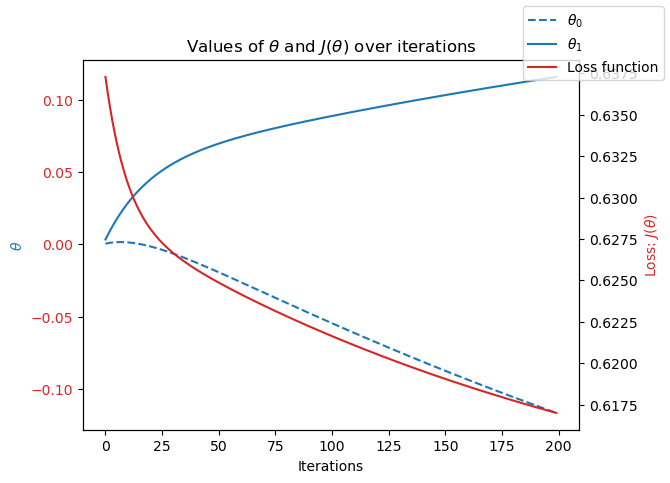

In [164]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [165]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10.0,10.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.67 s
Wall time: 1.67 s


In [166]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [167]:
dfyear1 = df[df['DATE'].astype(str).str.contains('2020')] 
dfyear1.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   2020-07-01 12:00:00    6.513661         0.236087            0.191498   
min    2020-01-01 00:00:00    1.000000        -1.682979           -1.629730   
25%    2020-04-01 06:00:00    4.000000        -0.552389           -0.560073   
50%    2020-07-01 12:00:00    7.000000         0.238684            0.237205   
75%    2020-09-30 18:00:00    9.750000         0.978830            0.986248   
max    2020-12-31 00:00:00   12.000000         2.309734            1.945251   
std                    NaN    3.455958         0.934854            0.915643   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.172345          0.263519              0.226841   
min             -1.581463         -1.490890             -1.607952   
25%             -0.590396         -0.430800             -0.503455   
50%              0.177166          0.233733              0.173970   
75%              0.947669          0.898267              0.851395   
max              1.935795          2.686179              2.500777   
std              0.923699          0.880960              0.905961   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000      3.660000e+02   
mean           0.246097            0.241620     -5.705221e-03   
min           -1.336828           -2.115665     -5.705221e-03   
25%           -0.425658           -0.508308     -5.705221e-03   
50%            0.140227            0.103186     -5.705221e-03   
75%            0.949090            1.029164     -5.705221e-03   
max            2.039297            3.038360     -5.705221e-03   
std            0.815164            0.974223      4.777020e-17   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.170559              0.279836          0.145252   
min              -1.625113             -1.732417         -1.635277   
25%              -0.644284             -0.427152         -0.637824   
50%               0.209401              0.232983         -0.091921   
75%               0.923832              0.949378          0.996516   
max               1.934934              2.783501          2.327576   
std               0.916080              0.913584          1.003402   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000    3.660000e+02   
mean             0.250035        0.275909   -7.461638e-04   
min             -1.434508       -1.290846   -7.461638e-04   
25%             -0.476246       -0.356463   -7.461638e-04   
50%              0.293506        0.110729   -7.461638e-04   
75%              0.953293        0.866124   -7.461638e-04   
max              2.147194        2.203991   -7.461638e-04   
std              0.875189        0.783143    4.451314e-18   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.256961             0.295811         0.319435   
min              -2.113343            -1.075304        -1.543707   
25%              -0.292519            -0.328869        -0.414197   
50%               0.248609             0.112771         0.323121   
75%               0.914051             0.949400         0.966314   
max               2.230310             2.159246         2.660579   
std               0.888164             0.788996         0.922377   

       VALENTIA_temp_mean  
count        3.660000e+02  
mean        -7.287352e-03  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03  
std          4.603310e-17

In [168]:
n_rows = dfyear1.shape[0]
i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])

In [169]:
#creating the x and y data sets needed for the optimization function
X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear1['ROMA_temp_mean'].to_numpy().reshape(n_rows,1)

In [170]:
compute_cost(X,y)

array([2.78380216e-07])

In [177]:
%%time


num_iterations=200 
theta_init=np.array([[1],[1]]) 
alpha=0.01 
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 109 ms
Wall time: 101 ms


In [178]:
# plotting the thetas, if it returns a straight line then the equation didn't converge and the above step size and iteration 
# inputs need to be updated

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [179]:
%%time
# theta range
theta0_vals = np.linspace(-0.2,0.2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10.0,10.0,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.78 s
Wall time: 1.76 s


In [180]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss


fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()